MatPlotLib의 특장점  
• MATLAB에서 제공하는 Plotting 기능 모두 제공 (3차원 Plotting도 지원)  
• 한꺼번에 Plotting 하지 않아도 되며, 조금씩 결과를 보면서 편집/수정 가능 (대화형 모드)  
(참고 문헌) https://matplotlib.org/index.html

## 1 MatPlotLib

###1.1MatPlotLib 용어

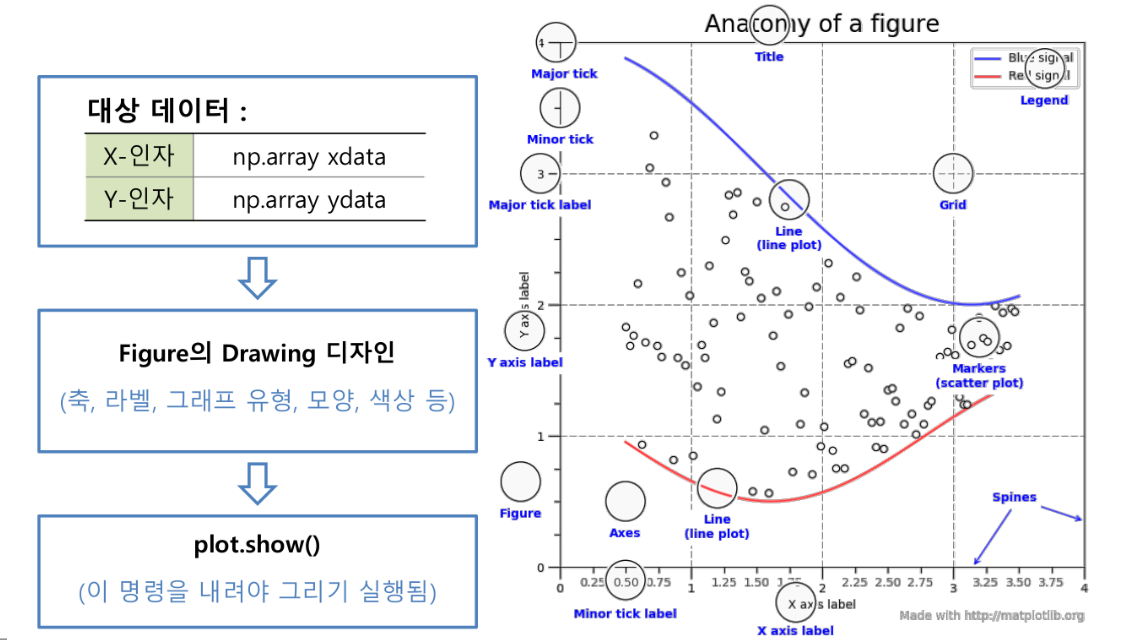

#### Figure  
• Plotting.show()의 결과를 Figure라고 함  
• Figure는 하나 이상의 축(Axes)과 Artists(title, legends, markers 등) 및
Canvas를 보여줌  
• Canvas는 plot이 그리는 오브젝트의 도화지(공간)에 해당함  
• 축 오브젝트는 최소 1개(1-D)부터 최대 3개(3-D)까지 사용 가능함  


#### Axes
• 각 축의 데이터 시각화 범위는 set_xlim(), set_ylim(), set_zlim()을 사용하여  
제어할 수 있음  
• Figure의 타이틀을 정할 수 있음 (set_title())  
• 하나의 Axes는 다른 Axes와 자신의 Artists를 공유할 수 없음 (즉, 각각
독립적으로 디자인 됨)  
• Axis Object에서는 그래프의 범위, major/minor tick의 표시, tick label 정의,
선 모양 등을 정함  


####Axis  
• Axis Object에서는 그래프의 범위, major/minor tick의 표시, tick label 정의,
선 모양 등을 정함  

• Figure는 하나 이상의 축(Axes)과 Artists(title, legends, markers 등) 및
Canvas를 보여줌  
• Tick의 위치 ~ Locator 오브젝트에 의해 결정; Tick Label ~ Formatter
오브젝트에 의해 결정  

####Artist
• Figure에서 보이는 모는 오브젝트가 Artist임
(Figure, Axes, Axis 오브젝트도 포함)  
• Text, Marker, Line2D, Bar, Pie-chart, 3D-graph, Colormap 등등  
• Figure가 그려질 때 모든 artist는 하나의 캔버스에 그려 짐  
• 2D-plot (X, Y) 또는 3D-plot (X, Y, Z)의 입력 데이터는 주로 np.array 또는
np.ma.masked_array  


####입력데이터
• Pandas의 DataFrame 객체 또는 np.matrix는 각 축을 np.array로 치환해야 함  
• Pandas의 경우, DataFrame의 Value method를 사용하면 Table column을
추출할 수 있음   
• Numpy의 경우, asarray() method를 사용할 수 있음  

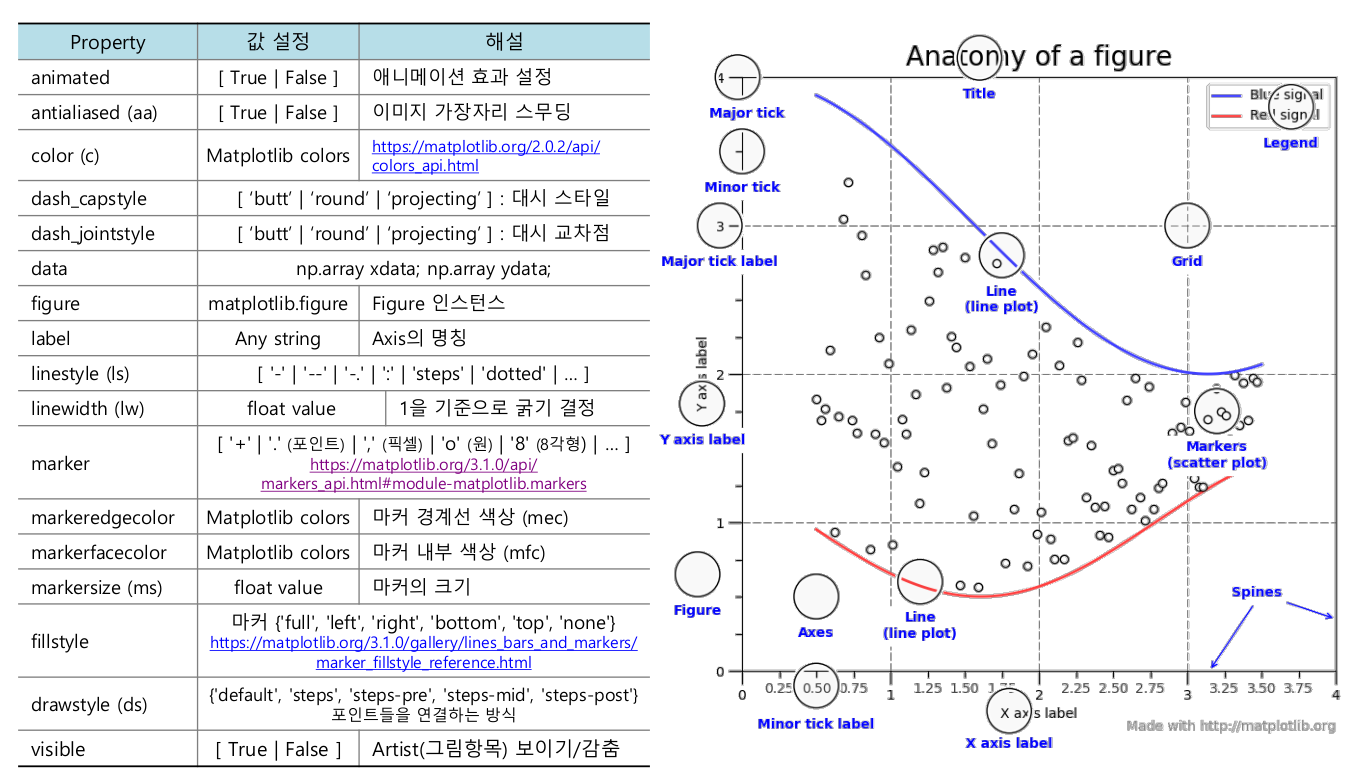

###1.2 MatPlotLib 그래프그리기 

#### 1D 직선 그래프 그리기

In [ ]:
%matplotlib inline

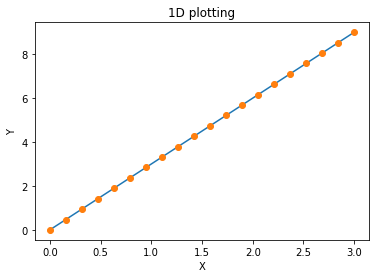

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x= np.linspace(0,3,20) # 구간 [0,3]을 20개 등분
y= np.linspace(0,9,20) # 구간 [0,9]을 20개 등분

plt.title("1D plotting") #그래프 타이틀 작업
plt.xlabel("X") #x축
plt.ylabel("Y") #y축

plt.plot(x,y)#x와 y의 관계로 플로팅
plt.plot(x,y,'o') #점 추가

plt.show()#show 명령으로 차트를 실제로 보여준다.

#### stacked-bar 차트

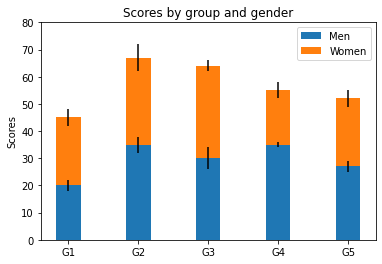

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)

ind = np.arange(N) # the x locations for the groups
width = 0.35 #그래프 넓이

# the width of the bars: can
# also be len(x) sequence
p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
bottom=menMeans, yerr=womenStd) 

#bottom 아래에 놓을 데이터 

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5')) #x축 틱의 라벨 정보, 및 갯수
plt.yticks(np.arange(0, 81, 10)) #y축 틱의 범위 설정
plt.legend((p1[0], p2[0]), ('Men', 'Women')) #lehend (범례정보)
plt.show()

#### Grouped bar 차트


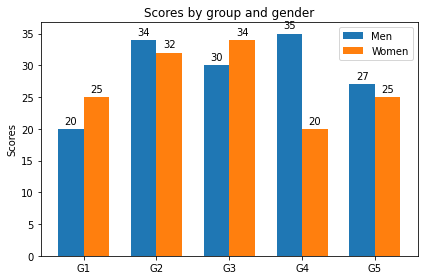

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#사용할 데이터 
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # 라벨 갯수
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

#### subplots 응용하여 그리기

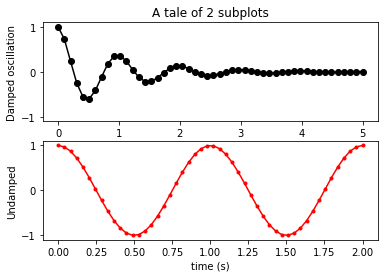

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data for plotting
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

# Create two subplots sharing y axis
fig, (ax1, ax2) = plt.subplots(2, sharey=True)

ax1.plot(x1, y1, 'ko-')
ax1.set(title='A tale of 2 subplots', ylabel='Damped oscillation')

ax2.plot(x2, y2, 'r.-')
ax2.set(xlabel='time (s)', ylabel='Undamped')

plt.show()

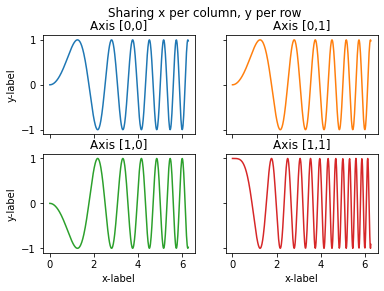

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0,0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0,1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1,0]')
axs[1, 1].plot(x, -y**2, 'tab:red')
axs[1, 1].set_title('Axis [1,1]')
fig.suptitle('Sharing x per column, y per row')

for ax in axs.flat:
  ax.set(xlabel='x-label', ylabel='y-label')
# Hide x labels and tick labels for top
# plots and y ticks for right plots.
for ax in axs.flat:
  ax.label_outer()
plt.show()

####Pie-chart 그리기  

Pie-chart의 autopct
파이 차트의 라벨을 표시하는 규격   

※ autopct를 사용자 정의
문자열로 하여, “숫자%\nstr”
꼴로 표시하도록 디자인 함

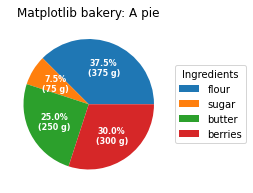

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

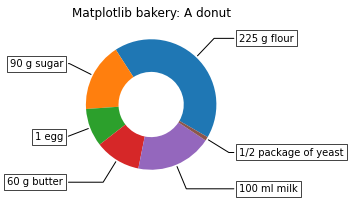

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["225 g flour",
          "90 g sugar",
          "1 egg",
          "60 g butter",
          "100 ml milk",
          "1/2 package of yeast"]

data = [225, 90, 50, 60, 100, 5]
                      #wedgeprops 반지름을 50%으로 한다.
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-30)
                      #startangle 첫번째 데이터를 x축으로부터 -30도로 시작한다.
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta1 + p.theta2)/2.0
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")

plt.show()

####scatter plot




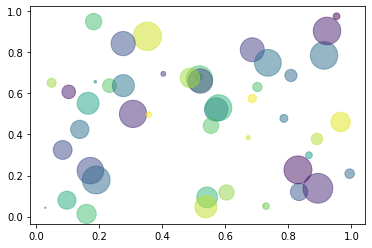

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(101)

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

#### 여러개의 선 그래프  


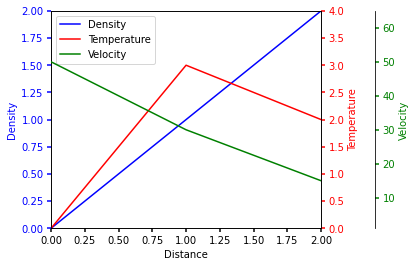

In [ ]:
import matplotlib.pyplot as plt


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()


par2.spines["right"].set_position(("axes", 1.2))
make_patch_spines_invisible(par2)

par2.spines["right"].set_visible(True)

p1, = host.plot([0, 1, 2], [0, 1, 2], "b-", label="Density")
p2, = par1.plot([0, 1, 2], [0, 3, 2], "r-", label="Temperature")
p3, = par2.plot([0, 1, 2], [50, 30, 15], "g-", label="Velocity")

host.set_xlim(0, 2)
host.set_ylim(0, 2)
par1.set_ylim(0, 4)
par2.set_ylim(1, 65)

host.set_xlabel("Distance")
host.set_ylabel("Density")
par1.set_ylabel("Temperature")
par2.set_ylabel("Velocity")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

####바이올린차트와 boxplot

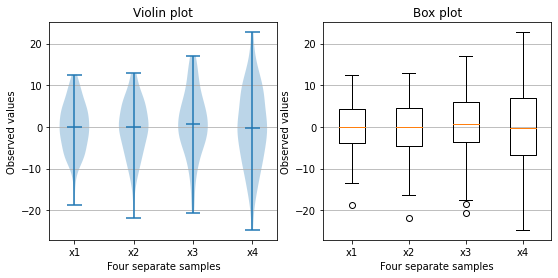

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Fixing random state for reproducibility
np.random.seed(19680801)


# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axes[0].violinplot(all_data,
                   showmeans=False,
                   showmedians=True)
axes[0].set_title('Violin plot')

# plot box plot
axes[1].boxplot(all_data)
axes[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))])
    ax.set_xlabel('Four separate samples')
    ax.set_ylabel('Observed values')

# add x-tick labels
plt.setp(axes, xticks=[y + 1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])
plt.show()

#### 정규분포 히스토그램

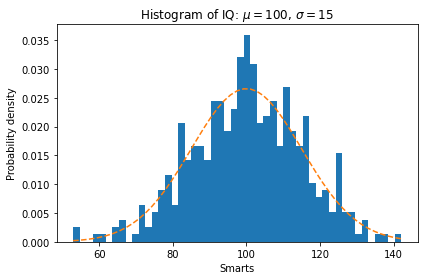

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

#### 멀티 히스토그램 

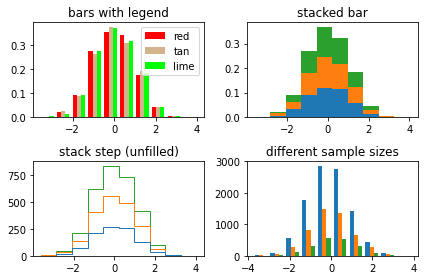

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=True, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

#### 히트맵

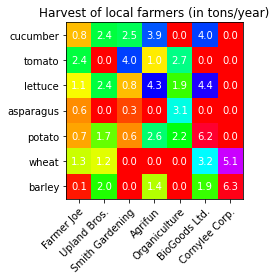

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest, cmap=plt.get_cmap('hsv'))

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

##2.Seaborn  
Five advantages of data visualization (데이터 시각화의 5가지 장점)  
1. quick, clear understanding of the information  
정보를 빠르고 명확하게 이해할 수 있음  
2. identify emerging trends and act quickly based on what we see  
우리가 알고자 하는 대상에 대한 최근 트렌드를 신속하게 파악하고 행동으로 옮길 수 있음  
3. identify relationships and patterns within digital assets  
디지털 자산 내에서 상호간 관계성 및 패턴을 인식할 수 있음  
4. can share our story with others easily  
우리의 이야기를 다른 사람들과 쉽게 공유 할 수 있음  
5. analysis at various levels of detail  
세부 사항들을 다양한 수준으로 분석할 수 있음  

### 2.1 seaborn 그래프 그리기

#### 선그래프 

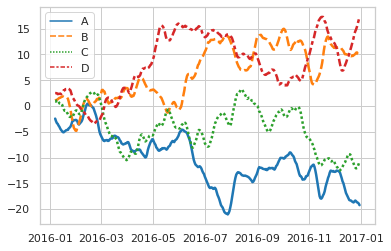

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", \
periods=365, freq="D")
data = pd.DataFrame(values, dates, \
columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()
sns.lineplot(data=data, \
palette="tab10", linewidth=2.5)

#### 와이드 선 그래프

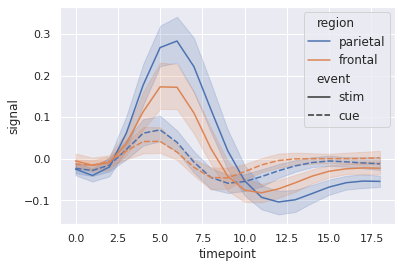

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")
# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")
# Plot the responses for different events
# and regions
sns.lineplot(x="timepoint", y="signal",
hue="region", style="event",
data=fmri)

#### 바이올린 차트

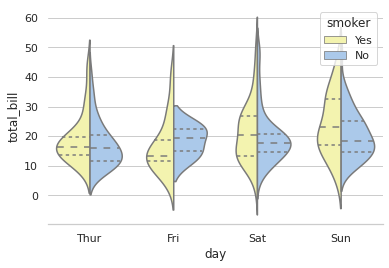

In [ ]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel",
color_codes=True)
# Load the example tips dataset
tips = sns.load_dataset("tips")
# Draw a nested violinplot and split the
# violins for easier comparison
sns.violinplot(x="day", y="total_bill",
hue="smoker",
split=True, inner="quart",
palette={"Yes": "y", "No": "b"},
data=tips)
sns.despine(left=True)

#### scatterplot matrix

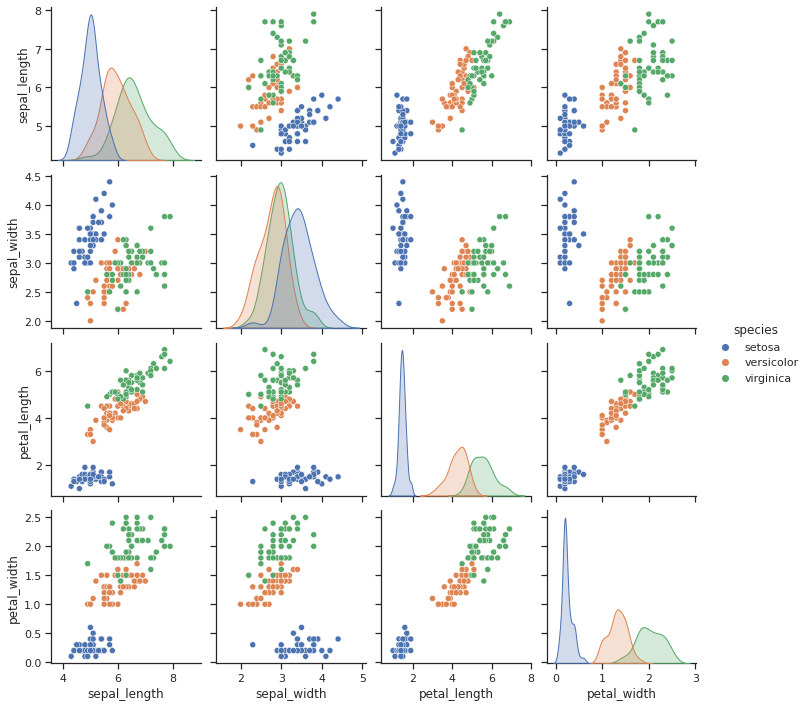

In [ ]:
import seaborn as sns
sns.set(style="ticks")
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

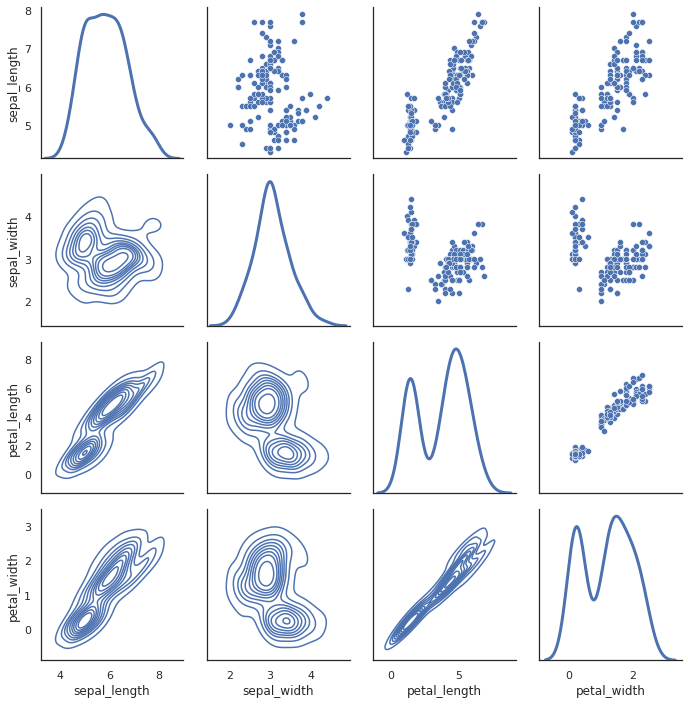

In [ ]:
import seaborn as sns
sns.set(style="white")
df = sns.load_dataset("iris")
g = sns.PairGrid(df,
diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)

####scatter density 차트

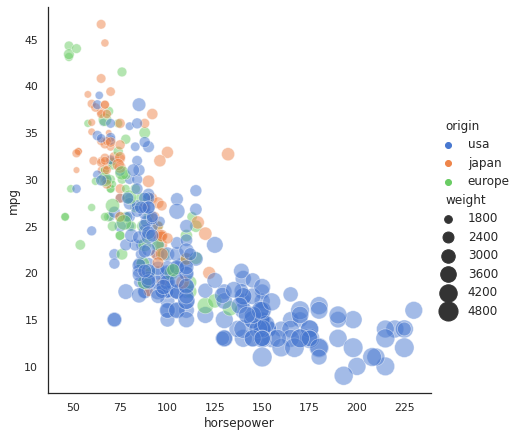

In [ ]:
import seaborn as sns
sns.set(style="white")
# Load the example mpg dataset
mpg = sns.load_dataset("mpg")
# Plot miles per gallon against
# horsepower with other semantics
sns.relplot(x="horsepower", y="mpg",
hue="origin", size="weight",
sizes=(40, 400), alpha=.5,
palette="muted",
height=6, data=mpg)


####히트맵

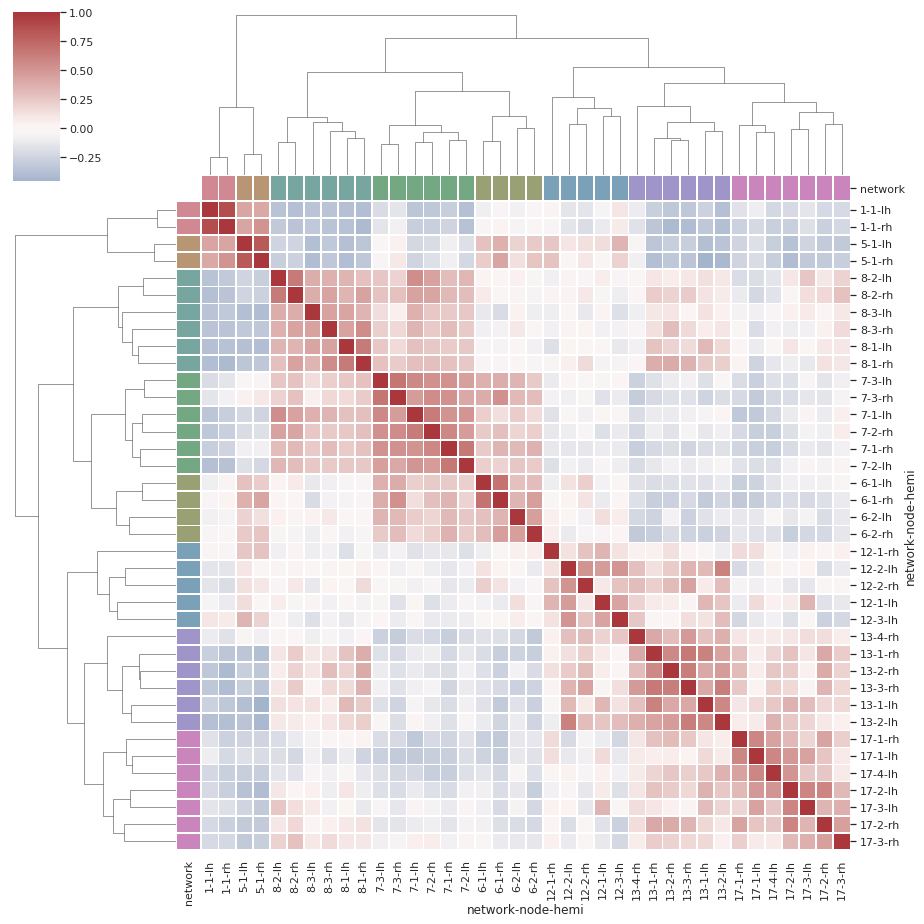

In [ ]:
import pandas as pd
import seaborn as sns
sns.set()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network").astype(int).isin(used_networks))

df = df.loc[:, used_columns]
# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)
# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag", row_colors=network_colors, 
               col_colors=network_colors, linewidths=.75, figsize=(13, 13))

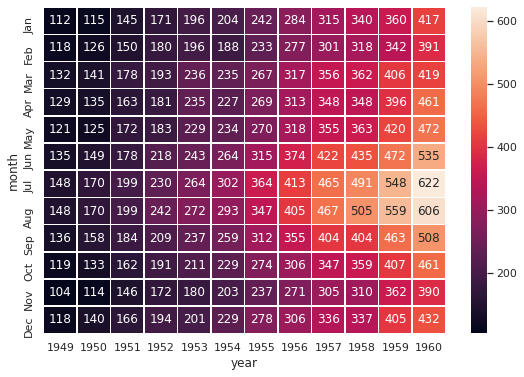

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")
# Draw a heatmap with the numeric 
# values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)